#### First import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Import the data in pandas dataframe.

#### to load this kind of file to dataframe with pandas.read_csv() pass ‘\s+’ as separator. Here \s+ means any one or more white space character.

In [45]:
# to load this kind of file to dataframe with pandas.read_csv() pass ‘\s+’ as separator. Here \s+ means any one or more white space character.
df=pd.read_csv('auto-mpg.data',delimiter='\s+',header=None,names=(['mpg','cylinders','displacement','horsepower','weight','acceleration','mode year','origin','car name'])) 

In [65]:
range(X.shape[1])

range(0, 2)

In [48]:
df.head(10)
#屬性信息：
#1. mpg：連續
#2.汽缸：多值離散
#3.位移：連續
#4.馬力：連續
#5.重量：連續
#6.加速度：連續
#7.車型年份：多值離散
#8.產地：多值離散
#9.汽車名稱：字符串（每個實例唯一）
#The commands header=None and names=([‘mpg’,’cylinders’,’displacement’,’horsepower’,’weight’,’acceleration’,’mode year’,’origin’,’car name’]) are required because the data file doesn’t contain header.

,mpg,cylinders,displacement,horsepower,weight,acceleration,mode year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


Data Exploration
Let’s spend sometime in understanding the data.

In [49]:
df.shape

(398, 9)

If you open the file in a text pad on your computer, you will find some records with ? value for horsepower feature.Let’s remove these records from data frame

In [52]:
df = df.drop(df[df.horsepower =="?"].index)
df.shape

(392, 9)

Because of ‘?’ in some of observations dataframe has considered horsepower as non numeric feature. Run below command to convert it to numeric feature.

In [54]:
df['horsepower']=pd.to_numeric(df['horsepower'])

Run below command to ensure it is being considered as numeric

In [55]:
df.applymap(np.isreal)

,mpg,cylinders,displacement,horsepower,weight,acceleration,mode year,origin,car name
0,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,False
2,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,True,False
5,True,True,True,True,True,True,True,True,False
6,True,True,True,True,True,True,True,True,False
7,True,True,True,True,True,True,True,True,False
8,True,True,True,True,True,True,True,True,False
9,True,True,True,True,True,True,True,True,False


Check if there exists any null observations

In [56]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
mode year       0
origin          0
car name        0
dtype: int64

Multicollinearity:
Multicollinearity is situation when independent variables in your data set are so much related to each other that including both of them in your data model will skew your prediction.
An optimal multi regression model requires removal of one of these related independent variables from the model.
You can find out whether your data set has multicollinearity situation by finding it Variance Inflation Factor (VIF) from statsmodels.stats.outliers library.

多元共線性
Multi-Collinearity
余民寧
2000年12月
教育大辭書
名詞解釋:　　多元共線性是指多元迴歸分析中，自變項之間有相關存在的一種現象，是一種程度的問題(degree of matters)，而不是全有或全無(all or none)的狀態。多元共線性若是達嚴重的程度時，會對多元迴歸分析造成下列的不良影響： 　　1.膨脹最小平方法(least squares)估計參數值的變異數和共變數，使得迴歸係數的估計值變得很不精確； 　　2.膨脹迴歸係數估計值的相關係數； 　　3.膨脹預測值的變異數，但對預測能力不影響； 　　4.造成解釋迴歸係數及其信賴區間估計之困難； 　　5.造成整體模式的考驗達顯著，但各別迴歸係數之考驗不顯著的矛盾現象和解釋上之困擾； 　　6.造成迴歸係數的正負號與所期望者相反的衝突現象，這是由於自變項間之壓抑效果(suppress effect)造成的。 　　一個比較簡單的診斷方法是察看自變項間的相關係數矩陣，看看該矩陣中是否有元素值（即自變項兩兩之間的相關係數值）是大於.90以上者，若有，即表示該二變項互為多元共線性變項，並認為該迴歸分析中有嚴重的多元共線性問題存在。另一個比較正式、客觀的診斷法，則為使用第j個自變項的「變異數膨脹因子」(variance inflation factor)作為判斷的指標，凡變異數膨脹因子指標值大於10者，即表示第j個自變項是一個多元共線性變項。在一般的迴歸分析中，針對這種多元共線性問題，有些統計學家會建議將多元共線性變項予以刪除，不納入迴歸方程式中。但避免多元共線性問題所造成困擾的最佳解決方法，不是刪除該具有多元共線性變項，而是使用所謂的「偏差迴歸分析」(biased regression analysis, BRA)。其中以「山脊型迴歸」(ridge regression)最受到學者們的重視和使用；除此之外，尚有「主成分迴歸」(principal component regression)、「潛在根迴歸」(latent root regression)、「貝氏法迴歸」(Baysean regression)、「遞縮式迴歸」(shrinkage regression)等，不過這些偏差迴歸分析法所獲得的迴歸係數值都是「有偏差的」(biased)，亦即這些迴歸係數的期望值不等於母群體的迴歸係數值，所以稱作偏差迴歸係數估計值，而本補救多元共線性問題的方法即稱作偏差迴歸分析法。

In [62]:
df1 = df._get_numeric_data()
X=df1.drop(['mpg','origin'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,116.0,cylinders
1,86.5,displacement
2,60.3,horsepower
3,137.5,weight
4,69.4,acceleration
5,109.3,mode year


VIF Factor above 10 indicates multicollinearity. cyclinders has highesht VIF factor. Let’s remove these features from X array and calculate the VIF again.

In [63]:
X=df1.drop(['mpg','origin','weight','cylinders','mode year','horsepower'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.1,displacement
1,3.1,acceleration


Now you got only two features dsplacement and acceleration to build your model.

Define y

In [66]:
y=df['mpg']

Let’s draw a pair plot to understand relationship of dsplacement and acceleration with mpg

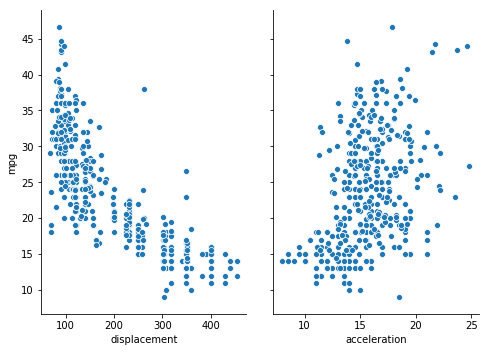

In [70]:
sns.pairplot(df,x_vars=['displacement','acceleration'],y_vars='mpg',height=5,aspect=0.7)
plt.show()

It looks more like polynomial linear regression, but let’s continue. We shall not expect very high r2 square though.

To get answer to second question below, we need to do p value analysis of the features and compare it with significance value. Let’s consider significance value of 0.5 and run below commands.

Q2:Which independent variable has higher impact on dependent variable and what is nature of impact?

In [72]:
import statsmodels.api as sm
X=sm.add_constant(X)
regressorOLS = sm.OLS(y, X).fit()
regressorOLS.summary()
#Observe P>|t| value for acceleration. It is more than 0.05.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     358.9
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           4.74e-89
Time:                        10:43:01   Log-Likelihood:                -1156.2
No. Observations:                 392   AIC:                             2318.
Df Residuals:                     389   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           36.1882      1.922     18.828      0.000      32.409      39.967
displacement    -0.0609      0.003    -22.791      0.000      -0.066      -0.056
acceleration    -0.0582      0.101     -0.575      0.566      -0.257       0.141
==============================================================================
Omnibus:                       43.926   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.179
Skew:                           0.725   Prob(JB):                     1.57e-15
Kurtosis:                       4.440   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Re-run the OLS regression analysis by removing acceleration

In [73]:
Xelm=X.drop(['acceleration'], axis=1)
regressorOLS = sm.OLS(y, Xelm).fit()
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     718.7
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           1.66e-90
Time:                        10:48:16   Log-Likelihood:                -1156.4
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     390   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           35.1206      0.494     71.033      0.000      34.149      36.093
displacement    -0.0601      0.002    -26.808      0.000      -0.064      -0.056
==============================================================================
Omnibus:                       41.308   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.139
Skew:                           0.709   Prob(JB):                     5.30e-14
Kurtosis:                       4.317   Cond. No.                         466.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Your equation has reduced to [mpg]=35.1206–0.0601[‘dsplacement’]

Now you can go ahead and create your model.

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
#train the model
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)
#predict y
y_pred=linear_reg.predict(X_test)

(313, 3) (79, 3) (313,) (79,)


Let’s compare some of the predicted target values with test values.

In [82]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head(10)

,Actual,Predicted
146,28.0,29.616941
282,22.3,26.696172
69,12.0,13.997704
378,38.0,28.722973
331,33.8,29.294171
257,19.4,21.176401
310,38.1,29.796082
328,30.0,26.461084
125,20.0,23.195892
108,20.0,29.321885


In [ ]:
df3 = pd.DataFrame({'Actual': _test, 'Predicted': y_pred})
df1.head(10)

It’s pretty close! Let’s review the bar chart.
kind : str
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot

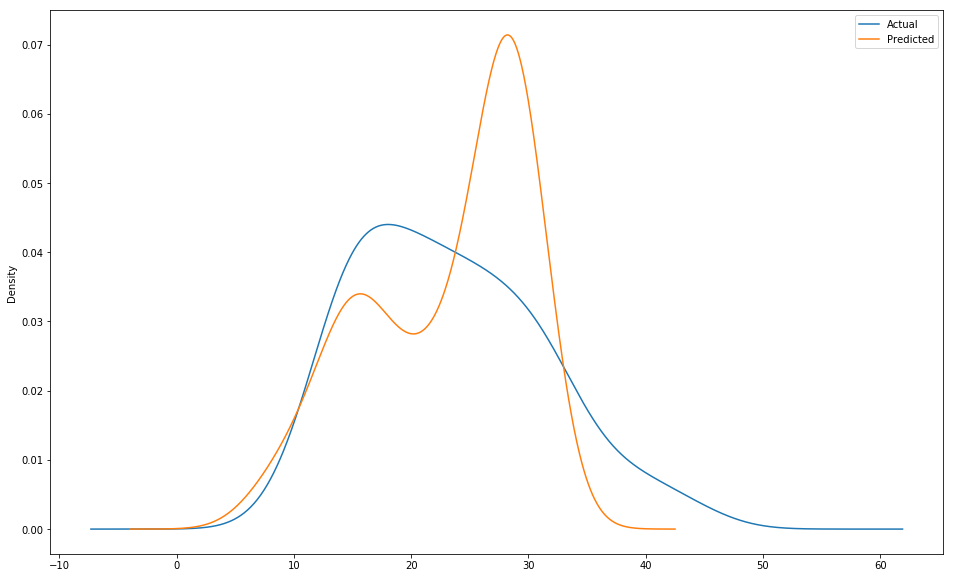

In [102]:
df2 = df1.head(79)
df2.plot(kind='kde',figsize=(16,10))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()